## Partie 1 : Apprentissage des paramètres d’un modèle à partir de données

Dans notre modèle, nous allons considérer qu’à chaque temps :
- chaque individu sain peut rester sain ou devenir infecté
- chaque individu infecté peut rester infecté ou devenir guéri
- chaque individu guéri reste guéri

et que la probabilité de passer d’un état à l’autre **ne dépend que de l’état précédent**.


Suivi d'un individu sur 10 jours : 
$S, S, S, I, I ,I ,I , I, I, R$

La matrice de probabilité de transitions

|  |S | I | R |
| :--|:--:| :--:|--:|
|S   | 2/3 |1/3  |0|
|I   | 1/6 | 5/6 |0|
|R   |0    |  0  |1|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Nous avons ensuite suivit une population de $5000$ individus, pendant $200$ jours. Pour lire les données
utiliser `np.loadtxt(‘data_exo1.txt’)`. 
Les individus sains sont note 0, les infecté 1 et les guéris 2.

In [2]:
data = np.loadtxt("data_ex1.txt", dtype =int) # Lecture des données

# 0 --> Sain (S)
# 1 --> Infecté (I)
# 2 --> Guéri (R)

def probas(data):
    m = np.zeros((3,3), dtype= float) #Création d'une matrice initialisée à 0
    prec = 9 #Declaration d'une variable précédent


    for individu in data : 
        for state in individu :
            if prec == 9 : #Si c'est la premiere valeur pour un individu on passe au suivant et on le met dans le precedent
                prec = state
                continue
            else : # Sinon on compte la transition dans la matrice m (precedent -> state)
                m[prec][state]+=1
            prec = state
        prec = 9 #A la fin de chaque individu il n'y a plus de precedent

    sum = np.sum(m,axis=1) #On somme toute les lignes
    
    for i in range(3) :
        for j in range(3) :
            m[i][j] = m[i][j]/sum[i] #On chaque case par le nombre total de transition dans une ligne
    
    return m
            


matrice = probas(data)


## Partie 2 : Description du premier modèle

Grâce au graph de transition du document 1 on obtient la matrice de transition A suivante :
|  |S | I | R |
| :--|:--:| :--:|--:|
|S   |0.92 | 0.08 |  0 |
|I   | 0   | 0.93 |0.07|
|R   |  0  |  0   |  1 |

In [3]:
A = [[0.92,0.08,0],[0,0.93,0.07],[0,0,1]]
print(A)

[[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]]


In [4]:
def stochastique(matrice) :
    return np.all(matrice >= 0 ) and np.all(np.sum(matrice, axis=1)) == 1

print(stochastique(matrice))

True


Au temps $t = 0$, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.
Soit $\pi_0$ la distribution de la probabilité initiale.
On a donc $\pi_0 = [0.9;0.1;0]$

In [5]:
pi0 = [0.9,0.1,0]
print(pi0)

[0.9, 0.1, 0]


Distribution :

Au temps $t = 1$ on a donc $\pi_0 \times A$ donc $\pi_1 = [0.828;0.165;0.007]$

In [6]:
pi1 = np.dot(pi0,A)
print(pi1)

[0.828 0.165 0.007]


Au temps $t = 2$ on a donc $\pi_1 \times A$ donc $\pi_2 = [0,76176;0,21969;0,01855]$

In [7]:
pi2 = np.dot(pi1,A)
print(pi2)

[0.76176 0.21969 0.01855]


Afin de calculer la distribution theorique des effectifs dans chaque états on doit donc calculer $\pi_t$ à chaque temps $t$
On a donc
$$ \pi_{t+1}=\pi_{t}\times A = (\pi_{t-1}\times A)\times A = \pi_0 \times A^t $$

(200, 3)


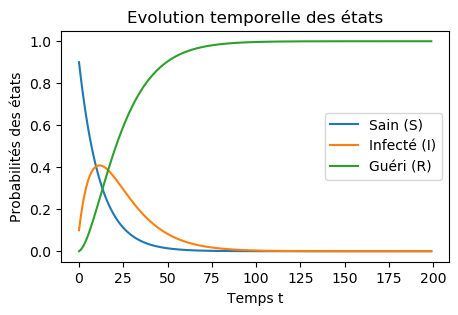

In [8]:
def distribution (pi,a,t):
    return np.matmul(pi,np.linalg.matrix_power(a,t))



for i in range (1,201) :
   distribution(pi0,A,i)

T = np.arange(200)

pit = np.zeros((200, 3))


for i in range(0, 200):
    pit[i] = distribution(pi0,A,i)

print(pit.shape)

fig = plt.figure(figsize=(5, 3))
plt.title("Evolution temporelle des états")
plt.plot(T, pit[:,0], label='Sain (S)')
plt.plot(T, pit[:,1], label="Infecté (I)")
plt.plot(T, pit[:,2], label="Guéri (R)")
plt.xlabel("Temps t")
plt.ylabel("Probabilités des états")
plt.legend()
plt.show()


#with open("example.txt","w") as f :
#    f.write("hello")



on peut voir qu'au bout d'un certain temps t on ne peut qu'etre dans l'etat guéri

np.random.choice([0.,1.,2.],1, p = pi0)Modelisation pour un individu sur 150 jours :

In [9]:
def gen_sequences(A,pi, t):
    etat = np.zeros(t)
    etat[0] = np.random.choice([0.,1.,2.],1, p = pi)
    for i in range(1,t):
        etat[i] = np.random.choice([0.,1.,2.],1, p=A[int(etat[i-1])])
    return etat

print(gen_sequences(A,pi0,150))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


Modélisation pour une population de taille n et de t jours

In [10]:
def gen_sequences_population(A,pi,n, t):
    etat = np.zeros((n,t))
    for i in range(n):
        etat[i][0] = np.random.choice([0.,1.,2.],1, p = pi)
        for j in range(1,t):
            etat[i][j] = np.random.choice([0.,1.,2.],1, p=A[int(etat[i][j-1])])
    return etat

p=gen_sequences_population(A,pi0,200,150)

def compteur(sequence,t):
    res = np.zeros((t,3))
    for i in range (len(sequence)):
        for j in range (len(sequence[0])):
            if sequence[i][j] == 0:
                res[j][0]+=1
            if sequence[i][j] == 1:
                res[j][1]+=1
            if sequence[i][j] == 2:
                res[j][2]+=1
    return res

z = compteur(p,150)

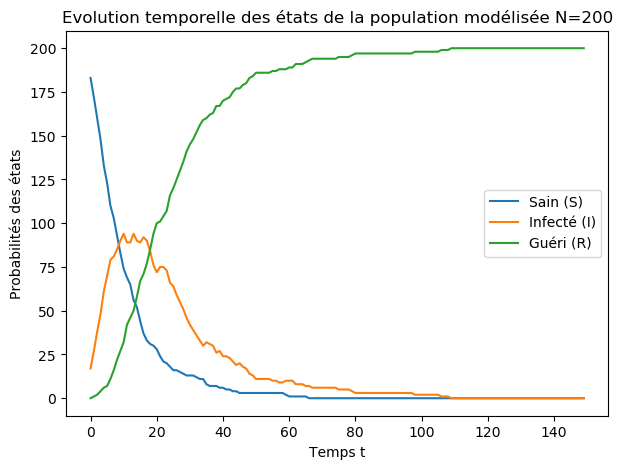

In [11]:
repartition = compteur(p,150)

T = np.arange(150)

fig = plt.figure(figsize=(7, 5))
plt.title("Evolution temporelle des états de la population modélisée N=200")
plt.plot(T, repartition[:,0], label='Sain (S)')
plt.plot(T, repartition[:,1], label="Infecté (I)")
plt.plot(T, repartition[:,2], label="Guéri (R)")
plt.xlabel("Temps t")
plt.ylabel("Probabilités des états")
plt.legend()
plt.show()



En pourcentage :

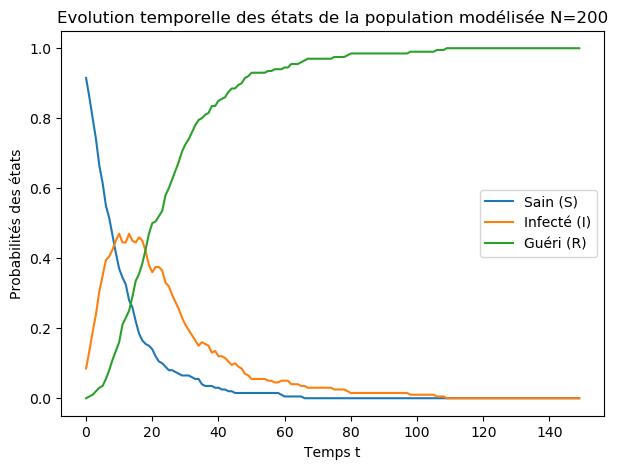

In [12]:
repartition/=200

fig = plt.figure(figsize=(7, 5))
plt.title("Evolution temporelle des états de la population modélisée N=200")
plt.plot(T, repartition[:,0], label='Sain (S)')
plt.plot(T, repartition[:,1], label="Infecté (I)")
plt.plot(T, repartition[:,2], label="Guéri (R)")
plt.xlabel("Temps t")
plt.ylabel("Probabilités des états")
plt.legend()
plt.show()

On peut donc remarquer que dans t est grand le pourcentage de personne infecté et sain est de 0 tandis que le nombre d'individus guéri est au maximum.



Pour 5 individus :

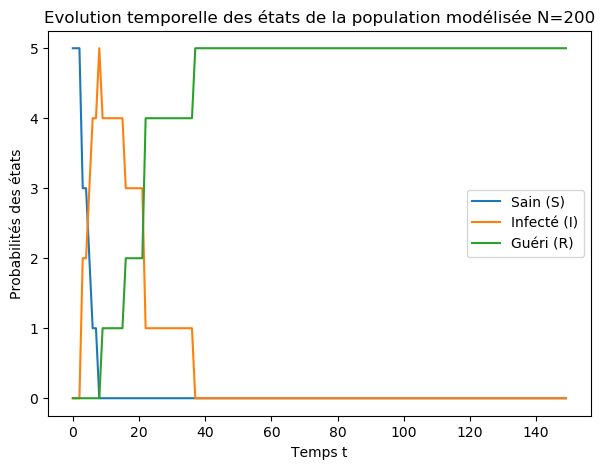

In [13]:
r=compteur(gen_sequences_population(A,pi0,5,150),150)

fig = plt.figure(figsize=(7, 5))
plt.title("Evolution temporelle des états de la population modélisée N=200")
plt.plot(T, r[:,0], label='Sain (S)')
plt.plot(T, r[:,1], label="Infecté (I)")
plt.plot(T, r[:,2], label="Guéri (R)")
plt.xlabel("Temps t")
plt.ylabel("Probabilités des états")
plt.legend()
plt.show()

Pour 5000 individus :

(5000, 150)


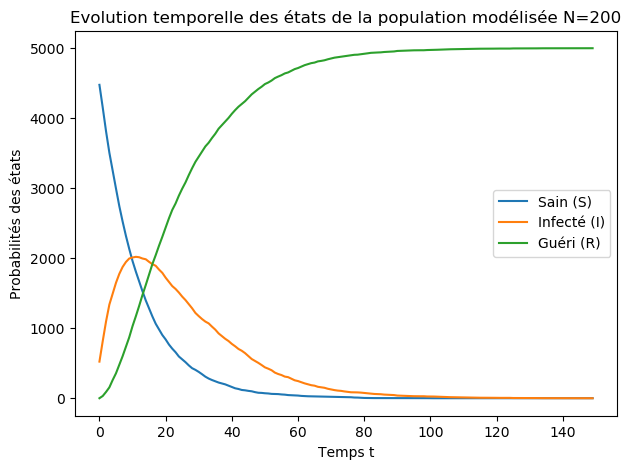

In [14]:
p = gen_sequences_population(A,pi0,5000,150)
print(p.shape)
r=compteur(p,150)

fig = plt.figure(figsize=(7, 5))
plt.title("Evolution temporelle des états de la population modélisée N=200")
plt.plot(T, r[:,0], label='Sain (S)')
plt.plot(T, r[:,1], label="Infecté (I)")
plt.plot(T, r[:,2], label="Guéri (R)")
plt.xlabel("Temps t")
plt.ylabel("Probabilités des états")
plt.legend()
plt.show()

La longueur moyenne d'une sequence de I sur une population de taille 5000 est donc de :

In [15]:
def moyenneI(sequences,t,a):
    r = np.zeros(a)
    for i in range(0,a):
        for j in range(0,t):
            if sequences[i][j] == 1:
                
                print("fhjk")
                r[a]+= 1
    print(np.sum(r))
    res = np.sum(r)/a
    return res

print(p[4000])
print(moyenneI(p,150,5000))

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
fhjk


IndexError: index 5000 is out of bounds for axis 0 with size 5000